In [2]:
from sklearn.datasets import load_boston
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

In [3]:
df = pd.read_csv('water.csv')

In [4]:
df.head()

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
1,2,North,Birkenhead,1668,17
2,3,South,Birmingham,1466,5
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18


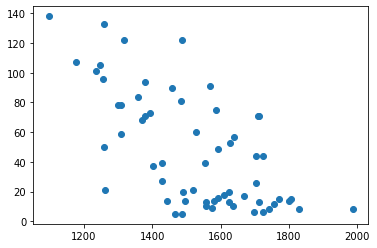

In [5]:
plt.scatter(df['mortality'],df['hardness'])

# коэффициенты корреляции Пирсона и Спирмена

In [6]:
df[['mortality','hardness']].corr(method='spearman')

,mortality,hardness
mortality,1.000000,-0.631665
hardness,-0.631665,1.000000


In [7]:
df[['mortality','hardness']].corr(method='pearson')

,mortality,hardness
mortality,1.000000,-0.654849
hardness,-0.654849,1.000000


# модель линейной регрессии


In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
X = df[['mortality']].values
Y = df['hardness'].values

In [10]:
model = LinearRegression()

In [11]:
model.fit(X,Y)
model.score(X,Y) #коэф детерминации 

0.4288267193124973

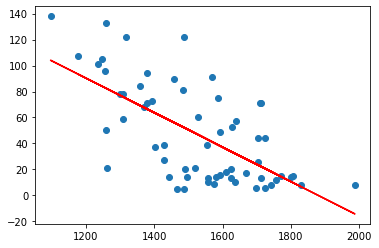

In [12]:
plt.scatter(df['mortality'],df['hardness'])
plt.plot(df['mortality'], model.predict(df[['mortality']]), c='r')

In [13]:
import statsmodels.api as sm

In [14]:
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [15]:
X = sm.add_constant(X)

In [16]:
model = sm.OLS(Y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.429
Model:                            OLS   Adj. R-squared:                  0.419
Method:                 Least Squares   F-statistic:                     44.30
Date:                Wed, 15 Sep 2021   Prob (F-statistic):           1.03e-08
Time:                        14:05:11   Log-Likelihood:                -291.01
No. Observations:                  61   AIC:                             586.0
Df Residuals:                      59   BIC:                             590.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        249.7769     30.666      8.145      0.0

In [17]:
print('parameters: ', results.params)
print('R2: ',results.rsquared)

parameters:  [ 2.49776928e+02 -1.32924533e-01]
R2:  0.42882671931249716


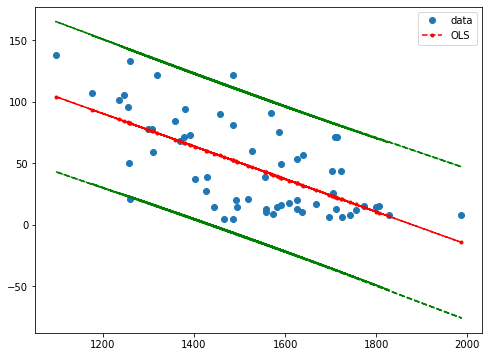

In [18]:
prstd, iv_l, iv_u = wls_prediction_std(results)

fig, ax = plt.subplots(figsize=(8,6))

ax.plot(X[:,1], Y, 'o', label="data")
ax.plot(X[:,1], results.fittedvalues, 'r--.', label="OLS")
ax.plot(X[:,1], iv_u, 'g--')
ax.plot(X[:,1], iv_l, 'g--')
ax.legend(loc='best');

# график остатков

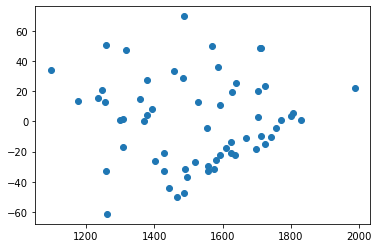

In [19]:
plt.scatter(X[:, 1], results.resid)

(array([ 2.,  3., 11., 10.,  9.,  9.,  8.,  3.,  5.,  1.]),
 array([-61.29201633, -48.18792189, -35.08382745, -21.97973301,
         -8.87563857,   4.22845587,  17.33255031,  30.43664475,
         43.54073919,  56.64483363,  69.74892807]),
 <a list of 10 Patch objects>)

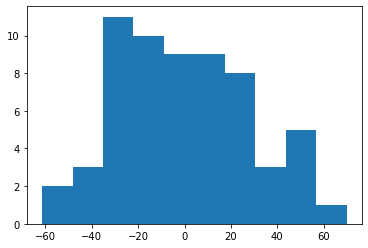

In [20]:
plt.hist(results.resid)

# Разделенные на 2 группы North и South

In [27]:
df_south = df[df['location'] == 'South']

In [31]:
df_north = df[df['location'] == 'North']

# # проверем по каждой группе

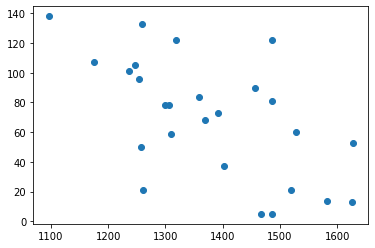

In [34]:
plt.scatter(df_south['mortality'], df_south['hardness'])

In [38]:
df_south[['mortality','hardness']].corr(method='spearman')

,mortality,hardness
mortality,1.000000,-0.595723
hardness,-0.595723,1.000000


In [39]:
df_south[['mortality','hardness']].corr(method='pearson')

,mortality,hardness
mortality,1.000000,-0.602153
hardness,-0.602153,1.000000


In [40]:
df_south[['mortality','hardness']].corr(method='kendall')

,mortality,hardness
mortality,1.000000,-0.440315
hardness,-0.440315,1.000000


In [78]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [79]:
X2 = df_south[['mortality']].values
Y2 = df_south['hardness'].values

In [80]:
model.fit(X2,Y2)
model.score(X2,Y2) 

0.3625885624364601

In [88]:
model.coef_

array([-0.17326199])

In [91]:
model.intercept_

308.31767129925424

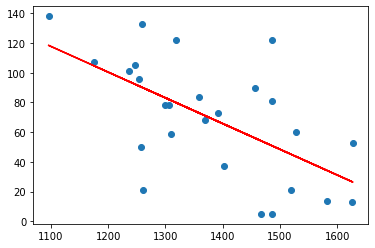

In [92]:
plt.scatter(df_south['mortality'], df_south['hardness'])
plt.plot(df_south['mortality'], model.predict(df_south[['mortality']]), c='r')

In [93]:
import statsmodels.api as sm


In [94]:
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [100]:
X2 = sm.add_constant(X2)

In [101]:
model1 = sm.OLS(Y2, X2)
results1 = model1.fit()
print(results1.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.363
Model:                            OLS   Adj. R-squared:                  0.336
Method:                 Least Squares   F-statistic:                     13.65
Date:                Wed, 15 Sep 2021   Prob (F-statistic):            0.00113
Time:                        15:09:22   Log-Likelihood:                -126.67
No. Observations:                  26   AIC:                             257.3
Df Residuals:                      24   BIC:                             259.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        308.3177     64.883      4.752      0.0

In [102]:
print('parameters: ', results1.params)
print('R2: ',results1.rsquared)
# Чем ближе коэффициент детерминации к 1, тем лучше регрессия «объясняет» зависимость данных 

parameters:  [ 3.08317671e+02 -1.73261990e-01]
R2:  0.3625885624364602


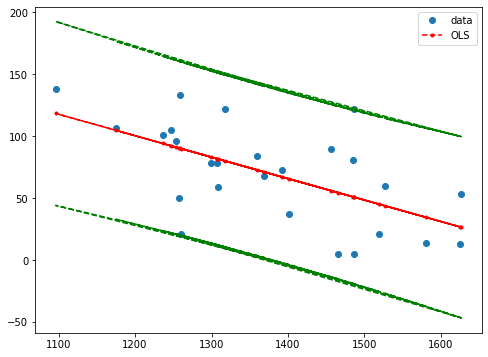

In [68]:
prstd, iv_l, iv_u = wls_prediction_std(results1)

fig, ax = plt.subplots(figsize=(8,6))

ax.plot(X2[:,1], Y2, 'o', label="data")
ax.plot(X2[:,1], results1.fittedvalues, 'r--.', label="OLS")
ax.plot(X2[:,1], iv_u, 'g--')
ax.plot(X2[:,1], iv_l, 'g--')
ax.legend(loc='best');

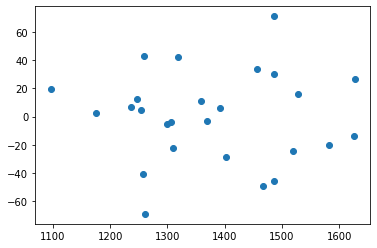

In [87]:
plt.scatter(X2[:, 1], results1.resid)
#остатки будут вести себя достаточно хаотично,
#в остатках не будет систематической составляющей, резких выбросов,
#в чередовании знаков не будет никаких закономерностей. 

(array([1., 2., 2., 4., 3., 6., 3., 4., 0., 1.]),
 array([-69.00756398, -54.99184301, -40.97612203, -26.96040106,
        -12.94468009,   1.07104088,  15.08676186,  29.10248283,
         43.1182038 ,  57.13392477,  71.14964575]),
 <a list of 10 Patch objects>)

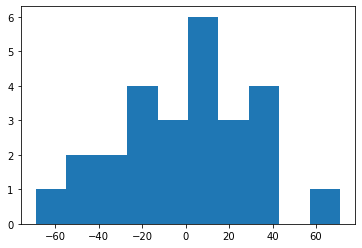

In [74]:
plt.hist(results1.resid)

In [103]:
df_north

,Unnamed: 0,location,town,mortality,hardness
1,2,North,Birkenhead,1668,17
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18
5,6,North,Bolton,1558,10
6,7,North,Bootle,1807,15
8,9,North,Bradford,1637,10
11,12,North,Burnley,1755,12
15,16,North,Darlington,1491,20
16,17,North,Derby,1555,39
17,18,North,Doncaster,1428,39


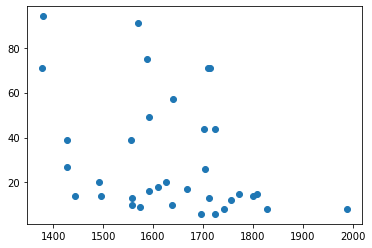

In [106]:
plt.scatter(df_north['mortality'], df_north['hardness'])

In [115]:
df_north[['mortality', 'hardness']].corr(method='spearman')

,mortality,hardness
mortality,1.000000,-0.404208
hardness,-0.404208,1.000000


In [117]:
df_north[['mortality', 'hardness']].corr(method='pearson')

,mortality,hardness
mortality,1.000000,-0.368598
hardness,-0.368598,1.000000


In [107]:
X3 = df_north[['mortality']].values
Y3 = df_north['hardness'].values

In [109]:
model.fit(X3,Y3)
model.score(X3,Y3)

0.1358643664207173

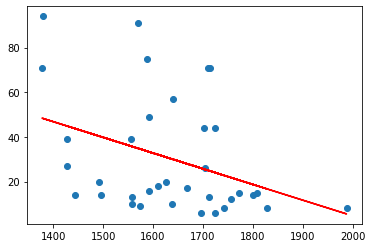

In [111]:
plt.scatter(df_north['mortality'], df_north['hardness'])
plt.plot(df_north['mortality'], model.predict(df_north[['mortality']]), c='r')

In [118]:
model.coef_

array([-0.07034712])

In [122]:
model.intercept_

145.3190622223783

In [123]:
X3 = sm.add_constant(X3)

In [124]:
model2 = sm.OLS(Y3,X3)
results2 = model2.fit()
print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.136
Model:                            OLS   Adj. R-squared:                  0.110
Method:                 Least Squares   F-statistic:                     5.188
Date:                Wed, 15 Sep 2021   Prob (F-statistic):             0.0293
Time:                        16:47:34   Log-Likelihood:                -160.81
No. Observations:                  35   AIC:                             325.6
Df Residuals:                      33   BIC:                             328.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        145.3191     50.623      2.871      0.0

In [125]:
print('parameters: ', results2.params)
print('R2(коэфф детерминации): ',results2.rsquared)

parameters:  [ 1.45319062e+02 -7.03471243e-02]
R2(коэфф детерминации):  0.1358643664207171


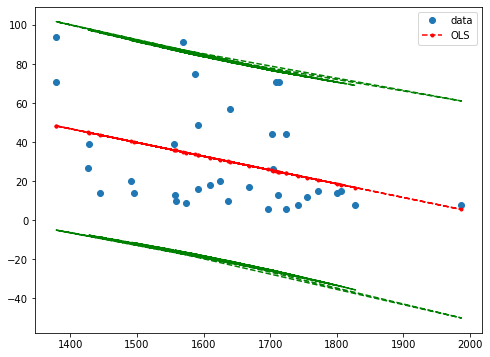

In [127]:
prstd, iv_l, iv_u = wls_prediction_std(results2)

fig, ax = plt.subplots(figsize=(8,6))

ax.plot(X3[:,1], Y3, 'o', label="data")
ax.plot(X3[:,1], results2.fittedvalues, 'r--.', label="OLS")
ax.plot(X3[:,1], iv_u, 'g--')
ax.plot(X3[:,1], iv_l, 'g--')
ax.legend(loc='best');

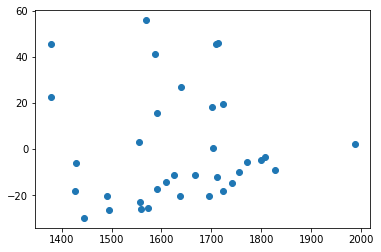

In [128]:
plt.scatter(X3[:, 1], results2.resid)

(array([5., 8., 8., 4., 0., 3., 2., 0., 4., 1.]),
 array([-29.73781476, -21.15847571, -12.57913666,  -3.9997976 ,
          4.57954145,  13.1588805 ,  21.73821956,  30.31755861,
         38.89689766,  47.47623672,  56.05557577]),
 <a list of 10 Patch objects>)

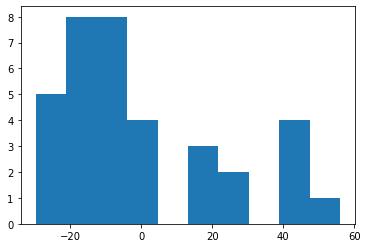

In [131]:
plt.hist(results2.resid)